# Linear Regression

y = f(x)
f(x) = mx + b

In [245]:
import pandas as pd

In [246]:
train = pd.read_csv('datasets/linear_regression/train.csv')
test = pd.read_csv('datasets/linear_regression/test.csv')

In [247]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [248]:
from matplotlib import pyplot as plt

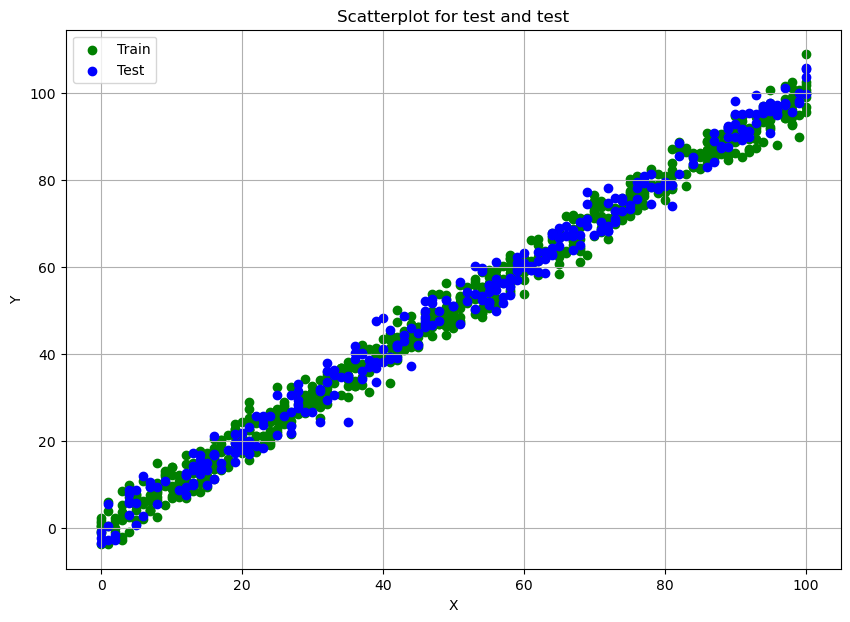

In [249]:
plt.figure(figsize=(10,7))

plt.scatter(x=train['x'], y=train['y'], color='green', label='Train')
plt.scatter(x=test['x'], y=test['y'], color='blue', label='Test')

plt.title('Scatterplot for test and test')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Linear Regression: Two Main Methods

## 1. Analytical Method (Normal Equation)
The **Normal Equation** provides a direct mathematical solution to find the optimal coefficients (\( m \) and \( b \)) without iteration.

### Formula:
$$
\theta = (X^T X)^{-1} X^T y
$$

### Explanation:
- \( X \): input matrix (features) with an added column of 1s for the intercept.  
- \( X^T \): transpose of \( X \).  
- \( (X^T X)^{-1} \): the inverse of \( X^T X \).  
- \( y \): output vector (target values).  
- \( \theta \): vector of coefficients (including slope \( m \) and intercept \( b \)).

---

## 2. Gradient Descent (Iterative Method)
**Gradient Descent** is an iterative optimization algorithm that minimizes the **cost function** by adjusting the coefficients step by step in the direction of the negative gradient.

### Cost Function:
The cost function \( J \) is defined as:
$$
J(m, b) = \frac{1}{n} \sum_{i=1}^n \left( y_i - (m x_i + b) \right)^2
$$

### Gradients:
- **Gradient for \( m \) (slope):**  
$$
\frac{\partial J}{\partial m} = -\frac{2}{n} \sum_{i=1}^n x_i \left( y_i - (m x_i + b) \right)
$$
- **Gradient for \( b \) (intercept):**  
$$
\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^n \left( y_i - (m x_i + b) \right)
$$

### Update Rules:
The coefficients \( m \) and \( b \) are updated as follows:
$$
m = m - \alpha \cdot \frac{\partial J}{\partial m}
$$
$$
b = b - \alpha \cdot \frac{\partial J}{\partial b}
$$

Where:
- alpha: Learning rate (controls step size).
- Repeat until convergence (minimum cost).

---

## Summary:
| Method            | Approach         | Pros                         | Cons                             |
|-------------------|------------------|------------------------------|----------------------------------|
| **Normal Equation** | Direct Solution | Fast for small datasets       | Computationally expensive for large datasets |
| **Gradient Descent** | Iterative       | Scalable for large datasets   | Requires tuning the learning rate |

# Analytical Method with normal equation

In [250]:
# drop nulls
train = train.dropna()

X_train = train[['x']].values  
y_train = train['y'].values 

In [251]:
X_train[:5], y_train[:5]

(array([[24.],
        [50.],
        [15.],
        [38.],
        [87.]]),
 array([21.54945196, 47.46446305, 17.21865634, 36.58639803, 87.28898389]))

In [252]:
import numpy as np

In [253]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

In [254]:
X_train

array([[ 1., 24.],
       [ 1., 50.],
       [ 1., 15.],
       ...,
       [ 1., 82.],
       [ 1., 66.],
       [ 1., 97.]])

In [255]:
theta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [256]:
b = theta[0]  
m = theta[1]  

In [257]:
b,m

(-0.10726546430096377, 1.0006563818563035)

In [258]:
X_test = test[['x']].values 
X_test = np.c_[np.ones(X_test.shape[0]), X_test]  
y_pred = X_test.dot(theta)  

test['y_pred'] = y_pred

In [259]:
def plot_prediction_function():
    plt.scatter(train['x'], train['y'], color='blue', label='Training Data')
    
    plt.plot(test['x'], test['y_pred'], color='red', label='Regression Line')
    
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Linear Regression - Analytical Solution')
    plt.legend()
    plt.show()

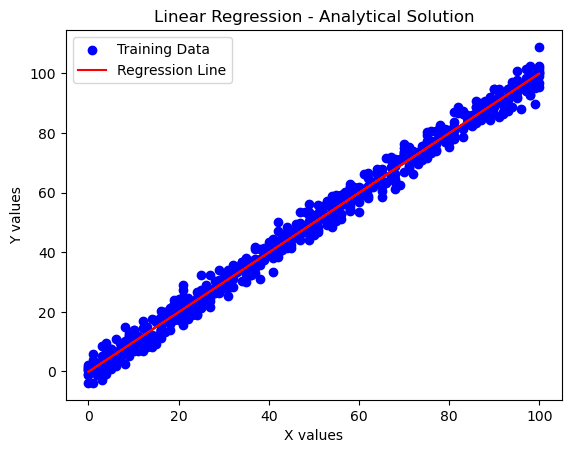

In [260]:
plot_prediction_function()

# Gradient Descent

In [261]:
train = pd.read_csv('datasets/linear_regression/train.csv')
test = pd.read_csv('datasets/linear_regression/test.csv')

In [262]:
train = train.dropna()

In [263]:
x = train['x'].values
y = train['y'].values

In [264]:
images = []

def gradient_descent(x, y, learning_rate=0.0001, iterations=50):
    n = len(y)
    m, b = 0, 0 
    costs = []  

    for i in range(iterations):
        y_pred = m * x + b

        error = y - y_pred
        dm = -(2 / n) * np.sum(x * error)
        db = -(2 / n) * np.sum(error)

        m = m - learning_rate * dm
        b = b - learning_rate * db

        cost = (1 / n) * np.sum(error ** 2)
        costs.append(cost)

        plt.figure(figsize=(6, 4))
        plt.scatter(x, y, color='blue', label='Training Data')
        plt.plot(x, m * x + b, color='red', label=f'Epoch {i+1}')
        plt.title(f'Gradient Descent: Epoch {i+1}\nCost: {cost:.4f}')
        plt.xlabel('X values')
        plt.ylabel('Y values')
        plt.legend()
        plt.grid()

        # Salvăm figura temporară
        file_name = f"epoch_{i+1}.png"
        plt.savefig(file_name)
        plt.close()

        # Adăugăm imaginea în lista pentru GIF
        images.append(Image.open(file_name))

    return m, b, costs

In [265]:
learning_rate = 0.00001
iterations = 100

In [266]:
m, b, costs = gradient_descent(x, y, learning_rate, iterations)

In [267]:
b,m

(0.01488798702541656, 0.997831665068291)

In [268]:
theta[0] = b
theta[1] = m

In [269]:
X_test = test[['x']].values
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred = X_test.dot(theta)

test['y_pred'] = y_pred

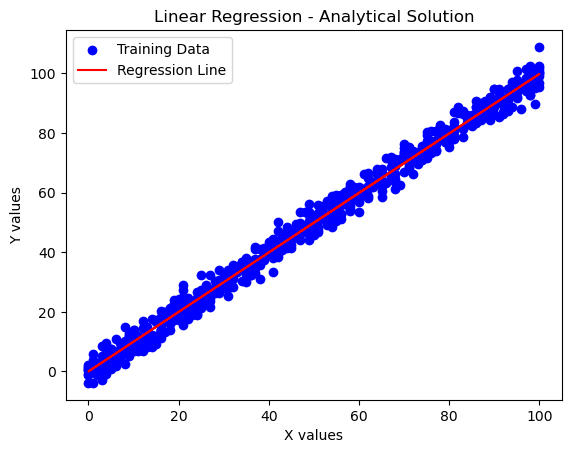

In [270]:
plot_prediction_function()

In [271]:
from PIL import Image
from io import BytesIO
from IPython.display import display, Image as IPImage

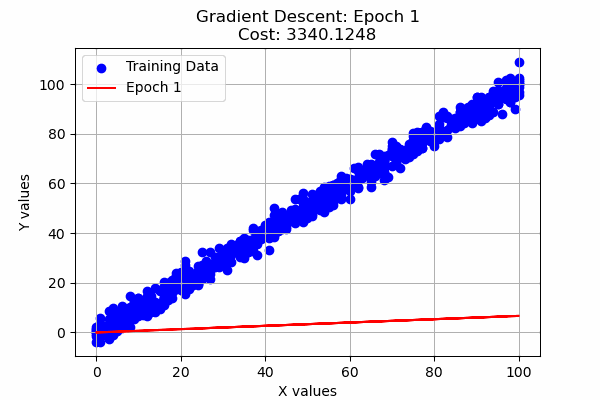

In [272]:
gif_path = BytesIO()
images[0].save(
    gif_path,
    format='GIF',
    save_all=True,
    append_images=images[1:],
    duration=200,  
    loop=0
)
gif_path.seek(0)

# Afișăm GIF-ul direct în notebook
display(IPImage(gif_path.read(), format='gif'))